# Gradiant Boosting Regression

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
boston=load_boston()
n_samples = len(boston.target)
X = boston.data
y = boston.target

## Step 1 Average

In [3]:
average_y=np.average(y)
print(f'the average y is : {average_y}')

the average y is : 22.532806324110677


## Step 2 For Loop

In [4]:
#Firstly let's explore
residuals0=boston.target - average_y
loss0=np.sum(residuals0 ** 2)
print(f'loss is {loss0}')
tree0 = DecisionTreeRegressor(max_depth=3)
tree0.fit(boston.data, residuals0)
new_residuals=average_y+0.1*tree0.predict(boston.data)-boston.target
new_loss=np.sum(new_residuals ** 2)
print(f'new_loss is {new_loss}')

loss is 42716.29541501977
new_loss is 36079.013132872846


In [5]:
#now let's get started
learning_rate=0.1
loss = [0] * 101
residuals = np.zeros([101,n_samples])
predictoin = np.zeros([101,n_samples])
#calculation
predictoin[0] = [average_y] * n_samples
residuals[0] = y - predictoin[0]
loss[0] = np.sum(residuals[0] ** 2)
trees = []

for i in range(100):
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X,residuals[i])
    trees.append(tree)
    #next prediction, residual
    predictoin[i+1]=predictoin[i]+learning_rate * tree.predict(X)
    residuals[i+1]=y-predictoin[i+1]
    loss[i+1] = np.sum(residuals[i+1] ** 2)

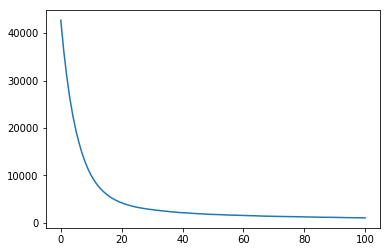

In [6]:
plt.plot(loss)

Reference:
    
https://www.youtube.com/watch?v=2xudPOBz-vs&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=45&t=0s

This article is based on this video.